<a href="https://colab.research.google.com/github/sowmyavarakala/Classification-on-Flipkart-products/blob/main/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classifier**

In [71]:
# Mounting the google drive to colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [72]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
# reading the input dataset
data = pd.read_csv("/content/gdrive/MyDrive/flipkart_com-ecommerce_cleaned_sample.csv")


In [74]:
data.head()

,Unnamed: 0,description,product_category_tree,primary_category
0,0,Key Features of Alisha Solid Women's Cycling S...,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Clothing
1,1,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,"[""Furniture >> Living Room Furniture >> Sofa B...",Furniture
2,2,Key Features of AW Bellies Sandals Wedges Heel...,"[""Footwear >> Women's Footwear >> Ballerinas >...",Footwear
3,3,Key Features of Alisha Solid Women's Cycling S...,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Clothing
4,4,Specifications of Sicons All Purpose Arnica Do...,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Pet Supplies


In [75]:
# listing out column names of the dataframe.
data.columns

Index(['Unnamed: 0', 'description', 'product_category_tree',
       'primary_category'],
      dtype='object')

In [76]:
#We got an extra column so dropping the column using drop().  
data.drop('Unnamed: 0',axis='columns', inplace=True)

In [77]:
#returns no of rows and columns of a dataframe.
data.shape

(20000, 3)

In [78]:
data.primary_category.describe()

count        20000
unique         266
top       Clothing
freq          6198
Name: primary_category, dtype: object

In [79]:
# nunique() returns no of unique values
# we do this to find no.of classes we have.
data.primary_category.nunique()

266

In [80]:
# A bar against Classes and frequency of each class
counts = data.primary_category.value_counts()  
most_frequent_category_names = counts[:266].index.tolist()
most_frequent_category_counts = counts[:266].values.tolist()
import plotly.graph_objects as go
fig = go.Figure(go.Bar(x=most_frequent_category_names, y=most_frequent_category_counts))
fig.show()

Next series of cells are written to plot a wordcloud

In [81]:
import spacy
import nltk
nlp = spacy.load("en_core_web_sm")
def count_words(matrix):
    words = []
    words_freq = []
    words_vals = []
    for desc in matrix:
        doc = nlp(desc)
        for token in doc:
            if not token.is_stop:
                words.append(doc)
    f = nltk.FreqDist(words)
    for x, v in f.most_common(10):
        words_freq.append(x)
        words_vals.append(v)
    return words, words_vals, words_freq

In [82]:
words, words_vals, words_freq = count_words(data.primary_category.values)

In [83]:
from wordcloud import WordCloud
im = WordCloud(width=640, height=800).generate(",".join([i.text for i in words]))

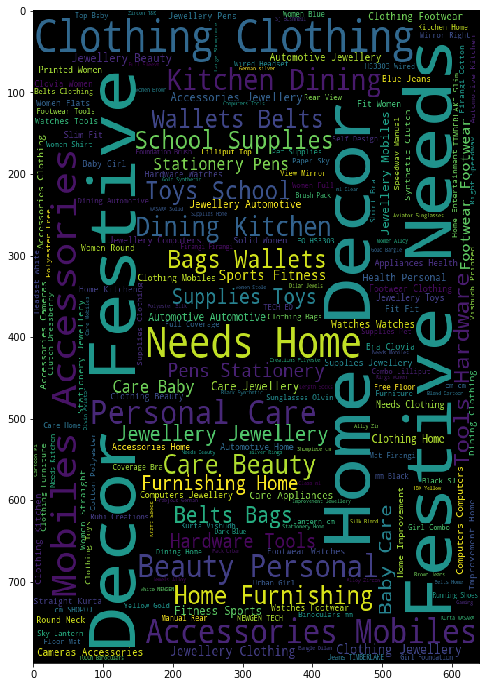

In [93]:
import matplotlib.pyplot as plt
f, a = plt.subplots(figsize=(8, 12))
a.imshow(im, interpolation='nearest', aspect='auto')

In [105]:
# importing classifier models
# CountVectorizer, TfidfTransformer
# Tf means term-frequency while tf-idf means term-frequency times inverse
# document-frequency. This is a common term weighting scheme in information
# retrieval, that has also found good use in document classification.

# The goal of using tf-idf instead of the raw frequencies of occurrence of a
# token in a given document is to scale down the impact of tokens that occur
# very frequently in a given corpus and that are hence empirically less
# informative than features that occur in a small fraction of the training
# corpus.
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import SVC
cv = CountVectorizer(stop_words='english')
tf = TfidfTransformer()
data.dropna(inplace=True)
X = cv.fit_transform(data.description.values)
y = data.primary_category.values

In [106]:
# Split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [96]:
# A random forest is a meta estimator that fits a number of decision tree
# classifiers on various sub-samples of the dataset and uses averaging to
# improve the predictive accuracy and control over-fitting.
# parameter max_depth = The maximum depth of the tree.
# parameter ramdom_state controls the randomness of the estimator
from sklearn.ensemble import RandomForestClassifier  
clf = RandomForestClassifier(max_depth=32, random_state=0)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
clf.score(X_test, y_test)

0.8736

In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

                                                      precision    recall  f1-score   support

          ABEEZ Boys, Men, Girls (Black, Pack of 1)"       0.00      0.00      0.00         1
        ANASAZI Casual 3/4 Sleeve Solid Women's Top"       0.00      0.00      0.00         1
Adidas IND PRO THI GUA Thigh Guard (White, Blue,..."       0.00      0.00      0.00         1
            Ajaero Slim Fit Women's Dark Blue Jeans"       0.00      0.00      0.00         1
                                          Automotive       0.97      0.96      0.97       248
     BALAJI EXPORTS Bottled Wine Cooler (9 Bottles)"       0.00      0.00      0.00         1
                                           Baby Care       0.93      0.47      0.62       146
                               Bags, Wallets & Belts       0.92      0.55      0.69        60
                            Beauty and Personal Care       0.99      0.83      0.90       197
                       COIRFIT Single Coir Mattress"       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



RandomForestClassifier gave an accuracy of around 88%


*   average precision = 0.87
*  average recall = 0.87
*   average F1 score = 0.86

In [98]:
# Naive Bayes classifier for multinomial models

# The multinomial Naive Bayes classifier is suitable for classification with
# discrete features (e.g., word counts for text classification). The
# multinomial distribution normally requires integer feature counts. However,
# in practice, fractional counts such as tf-idf may also work.
from sklearn.naive_bayes import MultinomialNB 
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [99]:
# Predicting the lables for X_test and calculating accuracy
y_predict = classifier.predict(X_test) 
classifier.score(X_test, y_test)

0.9022

In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

                                                      precision    recall  f1-score   support

          ABEEZ Boys, Men, Girls (Black, Pack of 1)"       0.00      0.00      0.00         1
        ANASAZI Casual 3/4 Sleeve Solid Women's Top"       0.00      0.00      0.00         1
Adidas IND PRO THI GUA Thigh Guard (White, Blue,..."       0.00      0.00      0.00         1
            Ajaero Slim Fit Women's Dark Blue Jeans"       0.00      0.00      0.00         1
                                          Automotive       0.89      0.99      0.94       248
     BALAJI EXPORTS Bottled Wine Cooler (9 Bottles)"       0.00      0.00      0.00         1
                                           Baby Care       0.91      0.50      0.65       146
                               Bags, Wallets & Belts       0.81      0.63      0.71        60
                            Beauty and Personal Care       0.82      0.87      0.85       197
                       COIRFIT Single Coir Mattress"       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Naive Bayes classifier for multinomial models gave an accuracy around 90%


*   average precision = 0.89
*  average recall = 0.90
*   average F1 score = 0.89



In [107]:
# Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. 
# DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset.
# The goal is to create a model that predicts the value of a target variable by learning simple decision rules 
# inferred from the data features. A tree can be seen as a piecewise constant approximation.
# parameter ramdom_state controls the randomness of the estimator
from sklearn.tree import DecisionTreeClassifier 
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)
classifier.score(X_test, y_test)

0.9348

In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

                                                      precision    recall  f1-score   support

          883 Police Full Sleeve Solid Men's Jacket"       0.00      0.00      0.00         1
                          ANAND ARCHIES Girls Flats"       1.00      1.00      1.00         1
                         ANAND ARCHIES Girls Wedges"       0.00      0.00      0.00         1
Abhinl Fashion Cotton Printed Semi-stitched Salw..."       0.00      0.00      0.00         1
            Ajaero Slim Fit Women's Dark Blue Jeans"       0.00      0.00      0.00         1
Amita Home Furnishing Cotton Floral Single Bedsh..."       0.00      0.00      0.00         1
Areon Luxurious Fragrance Long Lasting Car,Home,..."       0.00      0.00      0.00         1
                           Arial Morris Women Flats"       0.00      0.00      0.00         0
                  Asics Gel-Kayano 22 Running Shoes"       0.00      0.00      0.00         1
                                          Automotive       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



DecisionTreeClassifier gave an accuracy of 93%


*   average precision = 0.93
*  average recall = 0.93
*   average F1 score = 0.93

Reference : https://scikit-learn.org/stable/modules/multiclass.html